# Install dan Import Library

In [ ]:
pip install tensorflow

In [ ]:
!pip install -q keras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.utils import pad_sequences
from keras.preprocessing import sequence, text
from keras.models import Sequential
from keras.layers import GRU
from tensorflow.keras.layers import Dense, Activation, Dropout
from keras.layers import Embedding
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from sklearn.metrics import classification_report
sns.set()

# Show Data

In [ ]:
# import dataset dan menampilkan 5 data set awal
df = pd.read_csv('/content/drive/MyDrive/Data Mining/Emotion_classify_Data.csv')
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [ ]:
df.tail()

,Comment,Emotion
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear
5936,i just wanted to apologize to you because i fe...,anger


In [ ]:
df.describe(include="all")

,Comment,Emotion
count,5937,5937
unique,5934,3
top,i feel like a tortured artist when i talk to her,anger
freq,2,2000


In [ ]:
df.dtypes

Comment    object
Emotion    object
dtype: object

In [ ]:
# menampilkan isi dari tabel emotion
df.Emotion.unique()

array(['fear', 'anger', 'joy'], dtype=object)

# Check and Remove Duplicate Data

In [ ]:
# cek apakah ada data yang duplicate atau tidak
df[df.duplicated()].sum()

Comment    0
Emotion    0
dtype: object

In [ ]:
# menghapus data yang duplicate dan menampilkan lagi data nya
df.drop_duplicates(keep=False, inplace=True)
df.describe(include="all")

,Comment,Emotion
count,5937,5937
unique,5934,3
top,i feel like a tortured artist when i talk to her,anger
freq,2,2000


# Check and Remove Missing Data

In [ ]:
# cek apakah ada data yang hilang atau tidak
df.isnull().sum()

Comment    0
Emotion    0
dtype: int64

In [ ]:
# menghapus data yang hilang
df.dropna()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear


# Text Preprocessing

In [ ]:
#merubah array yang ada pada tabel emotion menjadi numeric
label_encoder = LabelEncoder()
df.Emotion = label_encoder.fit_transform(df.Emotion)
unique_labels = label_encoder.classes_
for label, value in zip(unique_labels, range(len(unique_labels))):
    print(f"Label: {label}  -  Numerical Value: {value}")

Label: anger  -  Numerical Value: 0
Label: fear  -  Numerical Value: 1
Label: joy  -  Numerical Value: 2


In [ ]:
# menghitung jumlah tiap value yang ada di tabel emotion
df.Emotion.value_counts()

Emotion
0    2000
2    2000
1    1937
Name: count, dtype: int64

In [ ]:
# menginstall sumber daya dari NLTK (stopwords and WordNet lemmatizer)
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# menginisialisasi NLTK and spaCy
nlp = spacy.load('en_core_web_sm')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def text_preprocessing(text):

    # menghapus spasi yang kedouble dan simbol
    text = re.sub(r'\s+', ' ', text)  # mengganti spasi yang kedouble menjadi satu spasi
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # menghapus simbol

    # merubah kata - kata menjadi huruf kecil
    text = text.lower()

    # membagi kata kedalam token memakai spaCy
    doc = nlp(text)

    # menghapus kata - kata yang secara makna tidak berarti dalam bahasa inggris (at, the, and) and merubah kata menjadi kata dasar
    processed_text = [token.lemma_ for token in doc if token.text not in stop_words]
    return ' '.join(processed_text)

# hasil dari text pre processing ditambahkan ke dataset
df['pre_text']=df.Comment.apply(text_preprocessing)

In [ ]:
df.head()

,Comment,Emotion,pre_text
0,i seriously hate one subject to death but now ...,1,seriously hate one subject death feel reluctan...
1,im so full of life i feel appalled,0,full life feel appalled
2,i sit here to write i start to dig out my feel...,1,sit write start dig feeling think afraid accep...
3,ive been really angry with r and i feel like a...,2,really angry r feel like idiot trust first place
4,i feel suspicious if there is no one outside l...,1,feel suspicious one outside like rapture happe...


In [ ]:
# membagi data menjadi traning set dan testing set
X_train, X_test, y_train, y_test = train_test_split(df.pre_text.values,df.Emotion.values, test_size=0.2, random_state=42,shuffle=True)
# x_train : data latihan kolom pre_text, x_test : data pengujian kolom pre_text
# y_train : data latihan kolom emotion, y_test : data pengujian kolom emotion
# test_size : proporsi pengujian dan latihan (0.2 maka 20 persen pengujian dan 80 persen latihan)
# random_state : seed (pembagian yang sama setiap menjalankan kode) untuk generator angka acak yang dipakai untuk mengacak data sebelum dibagi
# shuffle = True : agar data diacak sebelum dibagi (pengacakan membantu mengurangi bias dan menciptakan set latihan dan pengujian lebih representatif)

In [ ]:
# mencari panjang maximum teks dalam kolom pre_text
max_length = df['pre_text'].apply(lambda x: len(x)).max()
max_length

220

In [ ]:
# memecah teks menjadi unit yang dapat dipahami oleh model
token = text.Tokenizer(num_words=None)
max_len = 300
token.fit_on_texts(list(X_train) + list(X_test)) # menemukan semua kata unik dan memberikan indeks numerik untuk semua kata unik
xtrain_seq = token.texts_to_sequences(X_train) # mengkonversi setiap teks dalam data latihan menjadi urutan token numerik
xvalid_seq = token.texts_to_sequences(X_test) # mengkonversi setiap teks dalam data pengujian menjadi urutan token numerik

# memastikan semua urutan token memiliki panjang yang sama agar model dapat memprosesnya dengan lebih efisien
xtrain_pad = pad_sequences(xtrain_seq, maxlen=max_len) # memotong urutan token yang > max_len dan menambahkan token khusus jika lebih pendek dari max_len agar semua urutan sama panjang
xvalid_pad = pad_sequences(xvalid_seq, maxlen=max_len)

# memetakan kata ke indekx numberik dalam kosakata
word_index = token.word_index

# Training Model

In [ ]:
model = Sequential() # menambahkan layer secara berurutan (arsitektur sequential)
# melakukan pemetaan dari indeks numerik ke vektor dengan dimensi yang lebih rendah (output_dim = 300) yang bertujuan untuk menangkap hubungan semantik antar kata
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=300, input_length=max_len))

# mencegah overfitting dengan cara menonaktifkan acak sebagian neuron dalam lapisan selama masa latihan
model.add(SpatialDropout1D(0.2)) # 0.2 = 20 persen nilai dropout yg menunjukkan proporsi neuron yang dinonaktifkan secara acak

# menerima urutan token yang udah jadi vektor lalu diproses secara berurutan dan menangkap dependensi antar kata dalam urutan
# bidirectional berarti memproses urutan maju dan mundur untuk mendapatkan representasi yang lebih baik
# 100 (menentukan kompleksitas model)
# return_sequences = True (lapisan akan mengembalikan urutan output untuk diproses oleh lapisan selanjutnya)
model.add(Bidirectional(GRU(100, return_sequences=True)))

# menerima urutan representasi vektor dari lapisan sebelumnya lalu melakukan konvolusi untuk menangkap pola lokal antar kata dalam urutan
# filter : jumlah konvolusi (menentukan kompleksitas model)
# kernel_size : ukuran kernel yang digunakan untuk konvulsi (disini 3, berarti mempertimbangkan 3 kata terdekat dalam urutan)
# activation = 'relu' berarti aktivasi relu yang diterapkan pada hasil konvolusi
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# melakukan downsampling pada urutan untuk mengambil nilai max dari window tertentu (2) bertujuan untuk mengurangi dimensi data dan mencegah overfitting
# pool_size : 2 berarti ukuran window yang digunakan untuk downsampling 2
model.add(MaxPooling1D(pool_size=2))

# mengambil nilai max dari seluruh urutan untuk menghasilkan representasi tunggal dari urutan tersebut
model.add(GlobalMaxPooling1D())

# melakukan transformasi linear pada representasi tersebut (ada 3 neuron output karena menangani klasifikasi teks dengan 3 kategori)
model.add(Dense(3, activation='sigmoid')) # diterapkan pada output neuron untuk menghasilkan nilai antara 0 dan 1 (cocok untuk klasifikasi multi-class)
# mengkompilasi model
# loss : mengukur kesalahan prediksi model
# optimizer : algoritma optimasi untuk memperbaharui bobot model selama pelatihan
# metrics : metrik evaluasi yang dipantau selama pelatihan dan pengujian
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# mencetak ringkasan model, menampilkan informasi seperti jumlah parameter, layer, dan bentuk output setiap layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          2111700   
                                                                 
 spatial_dropout1d (Spatial  (None, 300, 300)          0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 300, 200)          241200    
 al)                                                             
                                                                 
 conv1d (Conv1D)             (None, 298, 64)           38464     
                                                                 
 max_pooling1d (MaxPooling1  (None, 149, 64)           0         
 D)                                                              
                                                        

In [ ]:
# melatih model nya menggunakan epochs dan batch size
# epochs = sebuah siklus dimana model memproses seluruh dataset yang dilatih (karena 5 maka model akan dilatih 5 kali)
# batch_size = jumlah sampel latih yang diproses oleh model sekaligus (karena 64 maka model akan memproses 64 sampel latih pada satu waktu)
model.fit(xtrain_pad,y_train,epochs=5, batch_size=64)

Epoch 1/5
75/75 [==============================] - 145s 2s/step - loss: 0.7438 - accuracy: 0.6932
Epoch 2/5
75/75 [==============================] - 138s 2s/step - loss: 0.0837 - accuracy: 0.9686
Epoch 3/5
75/75 [==============================] - 137s 2s/step - loss: 0.0258 - accuracy: 0.9933
Epoch 4/5
75/75 [==============================] - 132s 2s/step - loss: 0.0152 - accuracy: 0.9960
Epoch 5/5
75/75 [==============================] - 138s 2s/step - loss: 0.0109 - accuracy: 0.9958


In [ ]:
# membuat prediksi pada data validasi dan mengonversi prediksi menjadi label kategori lalu prediksi dapat dibandingkan dengan label kategori yang sebenarnya untuk data validasi
# setelah dapat maka bisa dibandingkan dengan metrik evaluasi (presisi, recall, f1-score) untuk mengukur seberapa baik model memprediksi kategori yang benar
y_pred = model.predict(xvalid_pad)
y_pred = np.argmax(y_pred, axis=1)

38/38 [==============================] - 11s 263ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       392
           1       0.93      0.95      0.94       416
           2       0.96      0.96      0.96       380

    accuracy                           0.95      1188
   macro avg       0.95      0.95      0.95      1188
weighted avg       0.95      0.95      0.95      1188



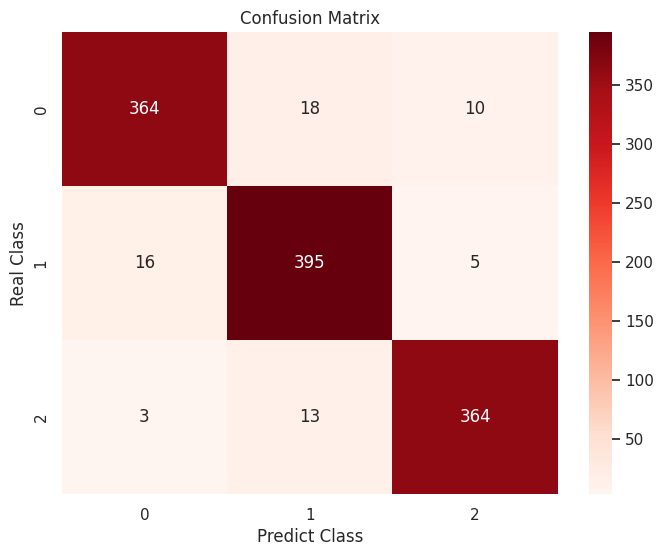

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predict Class')
plt.ylabel('Real Class')
plt.title('Confusion Matrix')
cm = confusion_matrix(y_test, y_pred)

In [ ]:
model.save('/content/drive/MyDrive/Data Mining/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing Model With User Input

## Angry Emotion

In [ ]:
user_input_text = "i hate you because you stole my pen"

# preprocessing text pakai function yang sudah dibuat
processed_user_text = text_preprocessing(user_input_text)

# tokenize and pad
user_text_tokens = token.texts_to_sequences([processed_user_text])
user_text_pad = pad_sequences(user_text_tokens, maxlen=max_len)

# memasukkan model yang sudah ditraining
model.load_weights('/content/drive/MyDrive/Data Mining/model.h5')

# prediksi emosi
emotion_labels = unique_labels.tolist()
prediction = model.predict(user_text_pad)
predicted_emotion_index = np.argmax(prediction)

# print hasil prediksi
print(f"Predicted Emotion (Encoded Value): {predicted_emotion_index}")
print(f"Predicted Emotion (Label): {emotion_labels[predicted_emotion_index]}")

1/1 [==============================] - 3s 3s/step
Predicted Emotion (Encoded Value): 0
Predicted Emotion (Label): anger


## Fear Emotion

In [ ]:
user_input_text = "i scare because you kick me"

# preprocessing text pakai function yang sudah dibuat
processed_user_text = text_preprocessing(user_input_text)

# tokenize and pad
user_text_tokens = token.texts_to_sequences([processed_user_text])
user_text_pad = pad_sequences(user_text_tokens, maxlen=max_len)

# memasukkan model yang sudah ditraining
model.load_weights('/content/drive/MyDrive/Data Mining/model.h5')

# prediksi emosi
emotion_labels = unique_labels.tolist()
prediction = model.predict(user_text_pad)
predicted_emotion_index = np.argmax(prediction)

# print hasil prediksi
print(f"Predicted Emotion (Encoded Value): {predicted_emotion_index}")
print(f"Predicted Emotion (Label): {emotion_labels[predicted_emotion_index]}")

1/1 [==============================] - 0s 50ms/step
Predicted Emotion (Encoded Value): 1
Predicted Emotion (Label): fear


## Joy Emotion

In [ ]:
user_input_text = "i happy have friend like you"

# preprocessing text pakai function yang sudah dibuat
processed_user_text = text_preprocessing(user_input_text)

# tokenize and pad
user_text_tokens = token.texts_to_sequences([processed_user_text])
user_text_pad = pad_sequences(user_text_tokens, maxlen=max_len)

# memasukkan model yang sudah ditraining
model.load_weights('/content/drive/MyDrive/Data Mining/model.h5')

# prediksi emosi
emotion_labels = unique_labels.tolist()
prediction = model.predict(user_text_pad)
predicted_emotion_index = np.argmax(prediction)

# print hasil prediksi
print(f"Predicted Emotion (Encoded Value): {predicted_emotion_index}")
print(f"Predicted Emotion (Label): {emotion_labels[predicted_emotion_index]}")

1/1 [==============================] - 0s 55ms/step
Predicted Emotion (Encoded Value): 2
Predicted Emotion (Label): joy


## Code Here

In [ ]:
user_input_text = "hello my name is hansel"

# preprocessing text pakai function yang sudah dibuat
processed_user_text = text_preprocessing(user_input_text)

# tokenize and pad
user_text_tokens = token.texts_to_sequences([processed_user_text])
user_text_pad = pad_sequences(user_text_tokens, maxlen=max_len)

# memasukkan model yang sudah ditraining
model.load_weights('/content/drive/MyDrive/Data Mining/model.h5')

# prediksi emosi
emotion_labels = unique_labels.tolist()
predicted_emotion_index = np.argmax(prediction)

# print hasil prediksi
print(f"Predicted Emotion (Encoded Value): {predicted_emotion_index}")
print(f"Predicted Emotion (Label): {emotion_labels[predicted_emotion_index]}")

Predicted Emotion (Encoded Value): 2
Predicted Emotion (Label): joy
